In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


Read Data

In [451]:
raw_data = pd.read_csv('data.csv')
copyData = raw_data.copy()


Drop the unnamed column

In [452]:
# drop the unnamed column
copyData.drop(copyData.columns[0], axis=1, inplace=True)
copyData.head()

,Festival_Name,Location,Attendance_Numbers,Visitor_Demographics,Economic_Impact,Music_Genre
0,UK,200000,18-35,Music Enthusiasts,£100 million,Various
1,Belgium,400000,18-30,EDM Fans,€150 million,EDM
2,Hungary,500000,18-40,International Attendees,€130 million,Various
3,Germany,90000,20-40,Rock Fans,€80 million,Rock
4,Denmark,130000,18-40,Alternative Music Lovers,DKK 70 million,Alternative


Exploratory Data Analysis

In [453]:
copyData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Festival_Name         205 non-null    object
 1   Location              205 non-null    int64 
 2   Attendance_Numbers    205 non-null    object
 3   Visitor_Demographics  205 non-null    object
 4   Economic_Impact       205 non-null    object
 5   Music_Genre           205 non-null    object
dtypes: int64(1), object(5)
memory usage: 9.7+ KB


In [454]:
copyData.describe()

,Location
count,205.000000
mean,41829.268293
std,54614.828859
min,5000.000000
25%,15000.000000
50%,30000.000000
75%,45000.000000
max,500000.000000


In [455]:
copyData.isnull().sum()

Festival_Name           0
Location                0
Attendance_Numbers      0
Visitor_Demographics    0
Economic_Impact         0
Music_Genre             0
dtype: int64

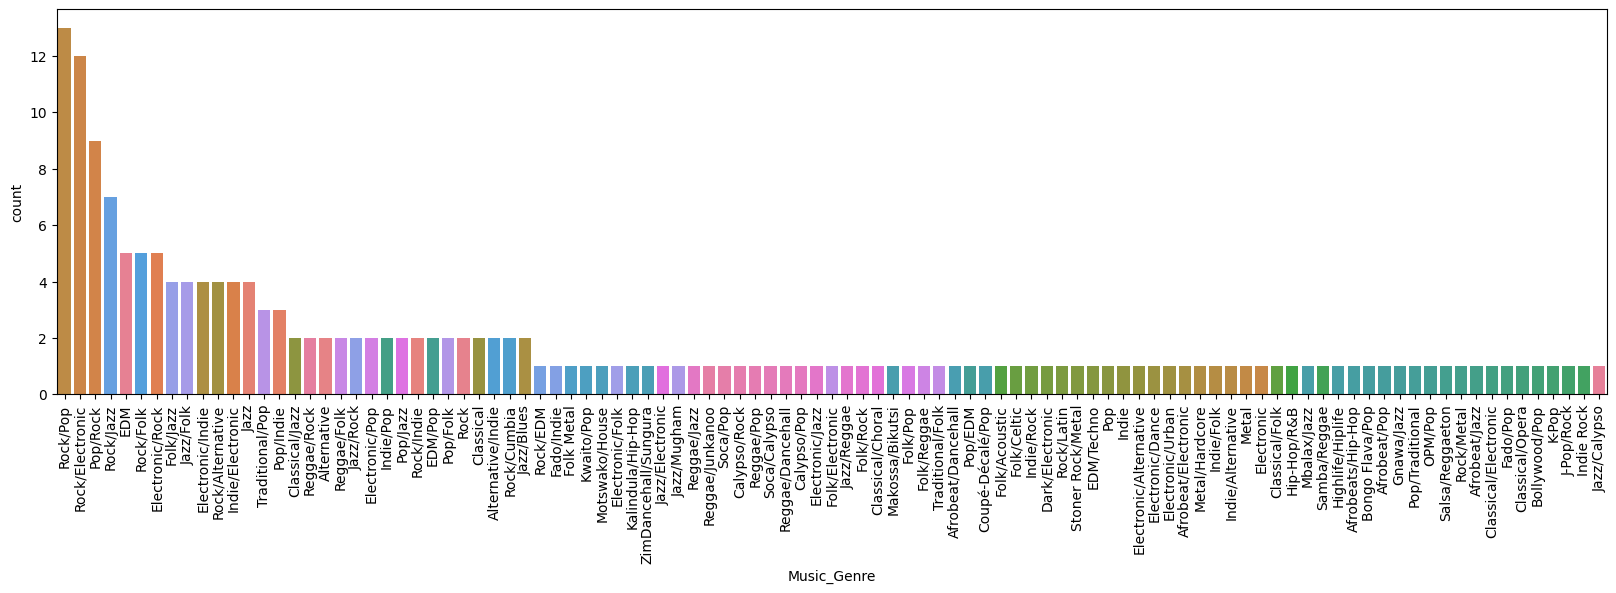

In [456]:
# drop lines with 'Various' in the Music_Genre column
copyData = copyData[copyData['Music_Genre'] != 'Various']

sns.countplot(data=copyData, x='Music_Genre', order=copyData['Music_Genre'].value_counts().index, hue='Music_Genre')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(20, 5)
plt.show()

In [457]:
copyData['Attendance_Numbers'] = copyData['Attendance_Numbers'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2 if isinstance(x, str) and '-' in x else float(x))
copyData['Attendance_Numbers'] = copyData['Attendance_Numbers'] * 1000
copyData['Attendance_Numbers'] = copyData['Attendance_Numbers'].astype(int)
copyData

,Festival_Name,Location,Attendance_Numbers,Visitor_Demographics,Economic_Impact,Music_Genre
1,Belgium,400000,24000,EDM Fans,€150 million,EDM
3,Germany,90000,30000,Rock Fans,€80 million,Rock
4,Denmark,130000,29000,Alternative Music Lovers,DKK 70 million,Alternative
5,UK,100000,25500,Rock and Indie Fans,£60 million,Rock/Indie
6,France,60000,45000,Jazz Enthusiasts,€20 million,Jazz
...,...,...,...,...,...,...
200,British Virgin Islands,10000,26500,Reggae and Rock Fans,USD 5 million,Reggae/Rock
201,Cayman Islands,15000,26500,Pop and Jazz Fans,KYD 8 million,Pop/Jazz
202,Bermuda,12000,29000,Rock and Folk Fans,BMD 6 million,Rock/Folk
203,Falkland Islands,5000,26500,Folk and Jazz Fans,FKP 2 million,Folk/Jazz


Text(0, 0.5, 'Frequency')

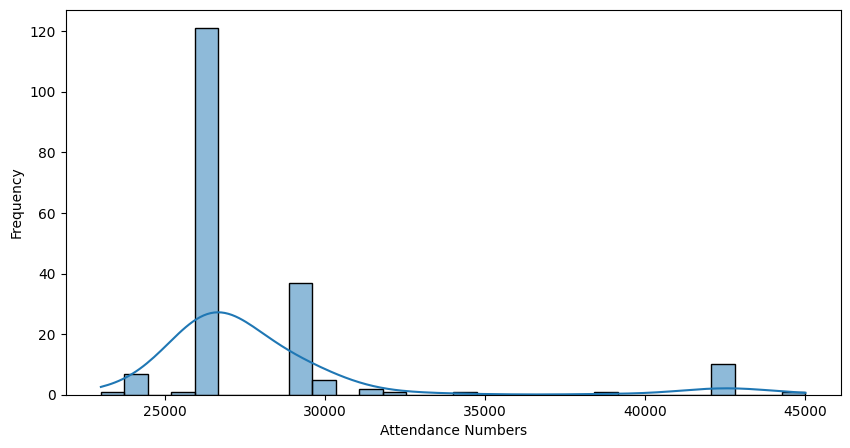

In [458]:
sns.histplot(data=copyData, x='Attendance_Numbers', bins=30, kde=True)
plt.gcf().set_size_inches(10, 5)
plt.xlabel('Attendance Numbers')
plt.ylabel('Frequency')

Text(0.5, 0, 'Visitor Demographics')

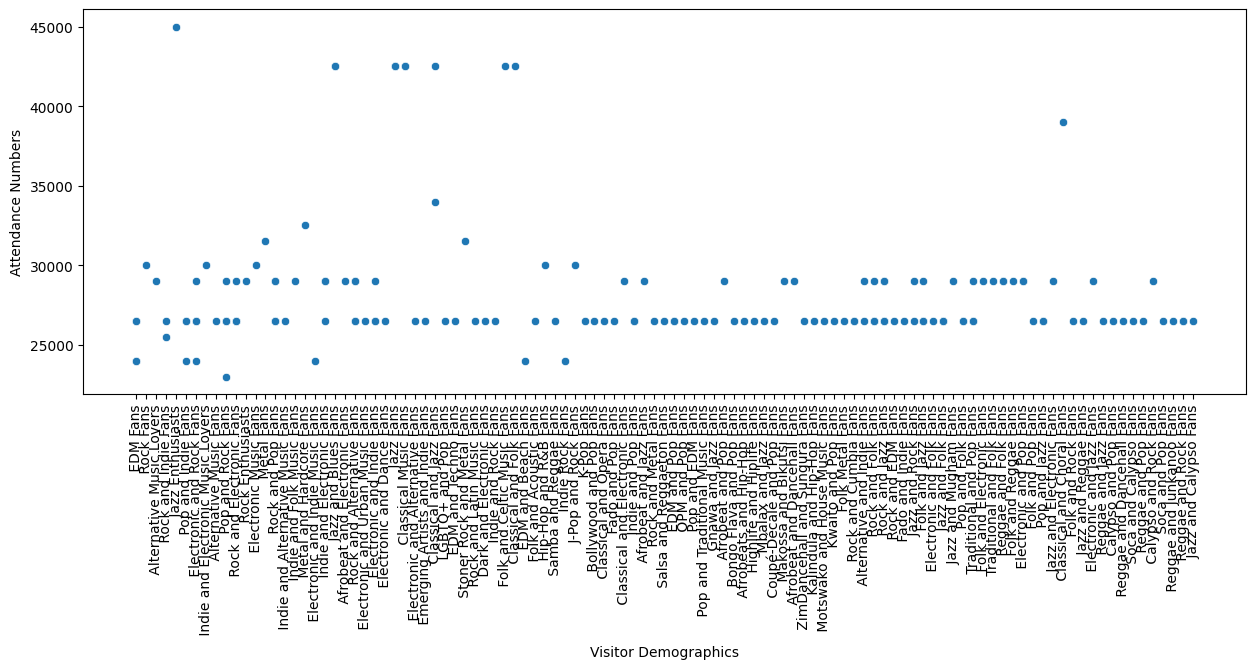

In [459]:
sns.scatterplot(data=copyData, x='Visitor_Demographics', y='Attendance_Numbers')
plt.gcf().set_size_inches(15, 5)
# plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.ylabel('Attendance Numbers')
plt.xlabel('Visitor Demographics')


In [460]:
# Convert Economic_Impact to numerical values and convert everything to eur
from preprocessing_data import clean_economic_impact

copyData['Economic_Impact_EUR'] = copyData['Economic_Impact'].apply(clean_economic_impact)
copyData = copyData[copyData['Economic_Impact_EUR'].round(2).isin(copyData['Economic_Impact_EUR'])]


# remove nan
# copyData = copyData.dropna()
# copyData = copyData.drop(columns=['Economic_Impact'])

# rename the column Festival_name to Country
copyData = copyData.rename(columns={'Festival_Name': 'Country'})
# copyData = copyData[copyData['Economic_Impact_EUR'] > 1]

def convert_to_millions(value):
    try:
        # Remove currency symbol and convert value
        if 'million' in value:
            return float(value.split(' ')[0][1:].replace(',', '')) * 1e6
        elif 'billion' in value:
            return float(value.split(' ')[0][1:].replace(',', '')) * 1e9
        elif 'thousand' in value:
            return float(value.split(' ')[0][1:].replace(',', '')) * 1e3
        else:
            return float(value.split(' ')[0][1:].replace(',', ''))
    except ValueError as e:
        print(f"Error converting value: {value} - {e}")
        return None

# Apply the function to the Economic_Impact column
copyData['Economic_Impact_EUR'] = copyData['Economic_Impact'].apply(convert_to_millions)

# Remove rows where Economic_Impact_EUR does not match the rounded value (this is just to mimic your operation)
copyData = copyData[copyData['Economic_Impact_EUR'].round(2).isin(copyData['Economic_Impact_EUR'])]
copyData.dropna(subset=['Economic_Impact_EUR'], inplace=True)

# save copydata to a new csv file   
copyData.to_csv('data_cleaned.csv')

copyData

# display all 130 result values in the column to see if there are any other values that need to be converted
# pd.set_option('display.max_rows', None)
# print (copyData['Economic_Impact'].value_counts())




Error converting value: DKK 70 million - could not convert string to float: 'KK'
Error converting value: AU$20 million - could not convert string to float: 'U$20'
Error converting value: CHF 10 million - could not convert string to float: 'HF'
Error converting value: USD 5 million - could not convert string to float: 'SD'
Error converting value: CHF 8 million - could not convert string to float: 'HF'
Error converting value: MXN 20 million - could not convert string to float: 'XN'
Error converting value: USD 8 million - could not convert string to float: 'SD'
Error converting value: CAD 10 million - could not convert string to float: 'AD'
Error converting value: NOK 15 million - could not convert string to float: 'OK'
Error converting value: NOK 20 million - could not convert string to float: 'OK'
Error converting value: CHF 15 million - could not convert string to float: 'HF'
Error converting value: USD 35 million - could not convert string to float: 'SD'
Error converting value: BRL 20

,Country,Location,Attendance_Numbers,Visitor_Demographics,Economic_Impact,Music_Genre,Economic_Impact_EUR
1,Belgium,400000,24000,EDM Fans,€150 million,EDM,150000000.0
3,Germany,90000,30000,Rock Fans,€80 million,Rock,80000000.0
5,UK,100000,25500,Rock and Indie Fans,£60 million,Rock/Indie,60000000.0
6,France,60000,45000,Jazz Enthusiasts,€20 million,Jazz,20000000.0
7,Spain,40000,26500,Pop and Indie Fans,€15 million,Pop/Indie,15000000.0
...,...,...,...,...,...,...,...
138,Montenegro,10000,29000,Rock and Jazz Fans,€5 million,Rock/Jazz,5000000.0
167,Andorra,8000,26500,Rock and Electronic Fans,€4 million,Rock/Electronic,4000000.0
168,San Marino,10000,26500,Pop and Jazz Fans,€5 million,Pop/Jazz,5000000.0
170,Monaco,12000,29000,Jazz and Electronic Fans,€6 million,Jazz/Electronic,6000000.0


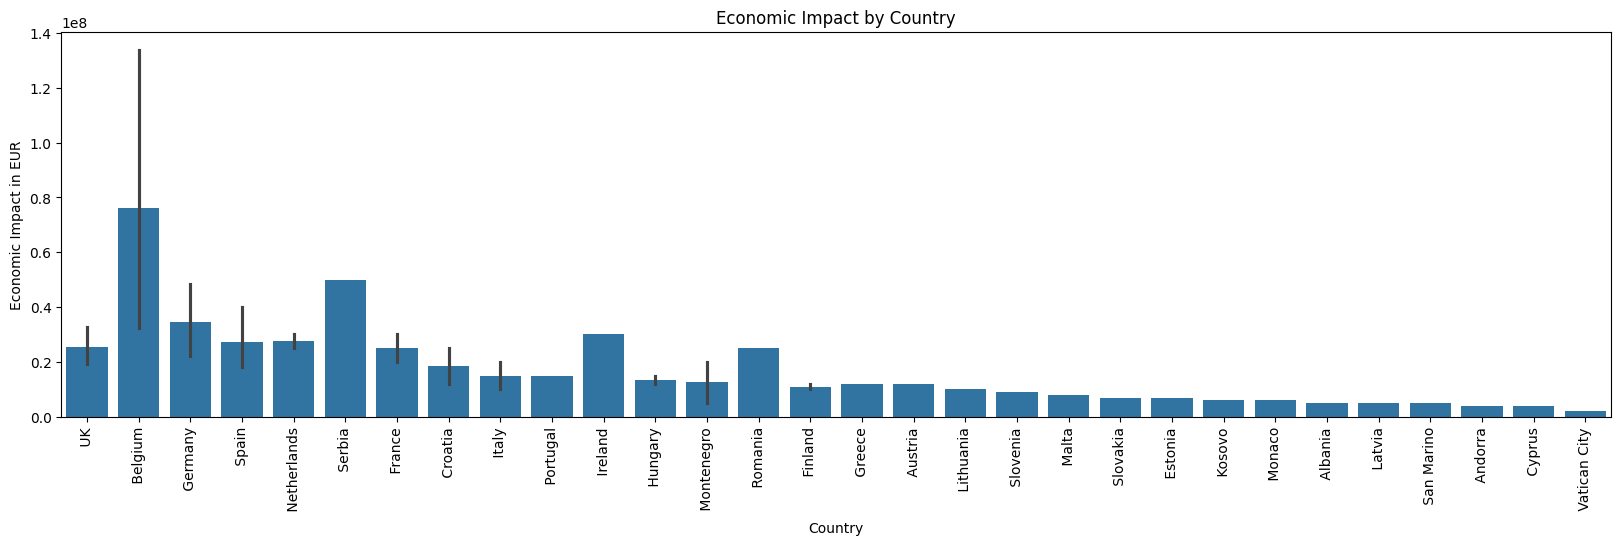

In [461]:
# Plot for economic impact by country and descending order

sns.barplot(data=copyData, x='Country', y='Economic_Impact_EUR', order=copyData.groupby('Country')['Economic_Impact_EUR'].sum().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(20, 5)
plt.xlabel('Country')
plt.ylabel('Economic Impact in EUR')
plt.title('Economic Impact by Country')
plt.show()

# copyData.describe()



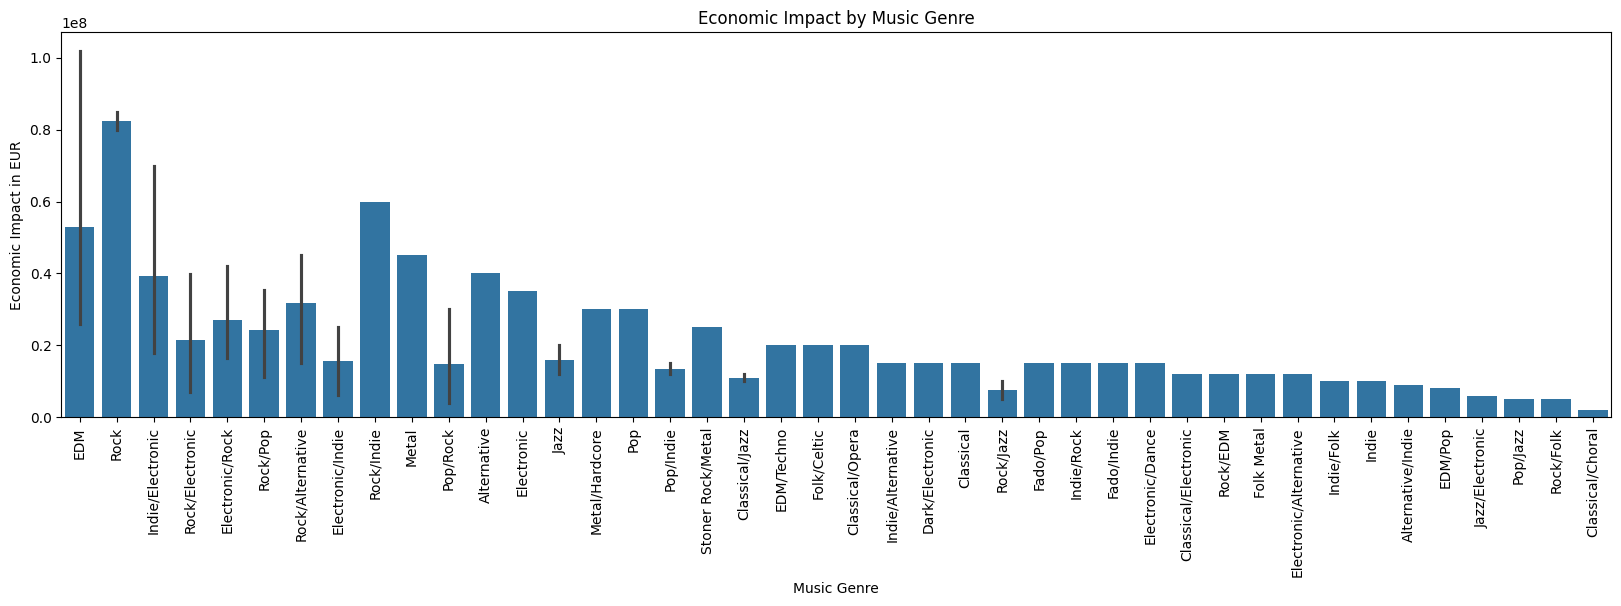

In [462]:
# Economic Impact by Music Genre
sns.barplot(data=copyData, x='Music_Genre', y='Economic_Impact_EUR', order=copyData.groupby('Music_Genre')['Economic_Impact_EUR'].sum().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(20, 5)
plt.xlabel('Music Genre')
plt.ylabel('Economic Impact in EUR')
plt.title('Economic Impact by Music Genre')
plt.show()

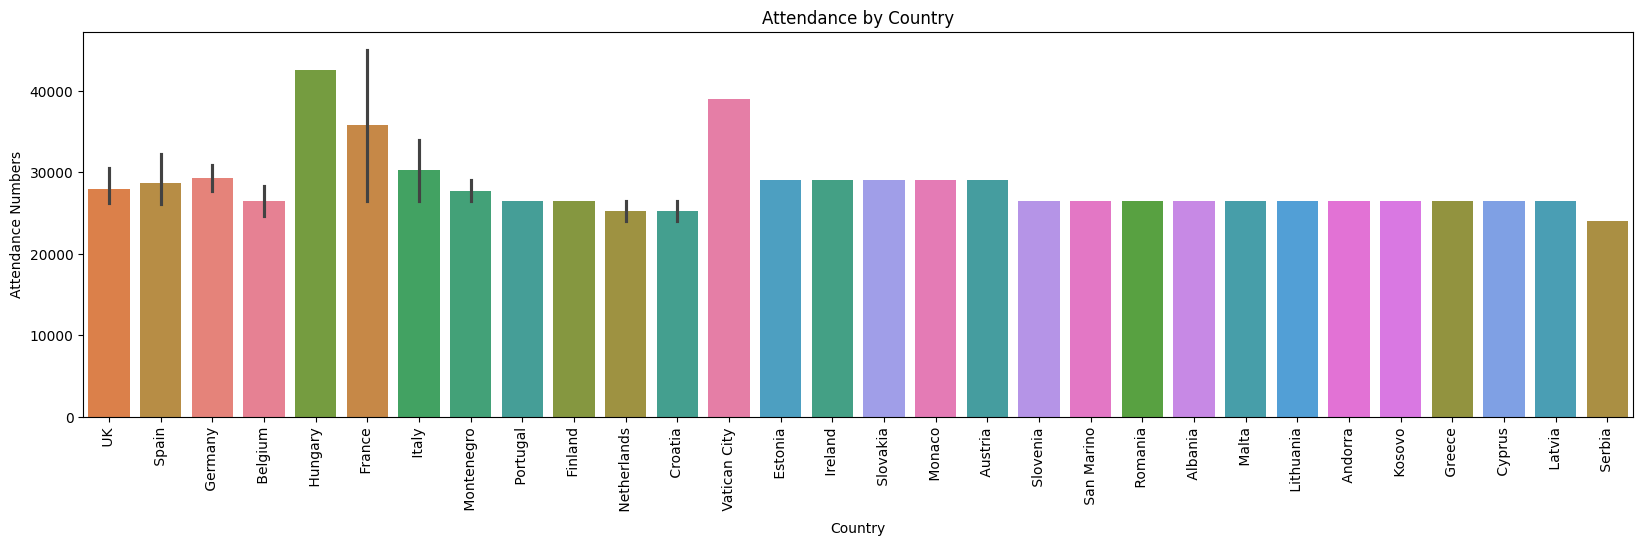

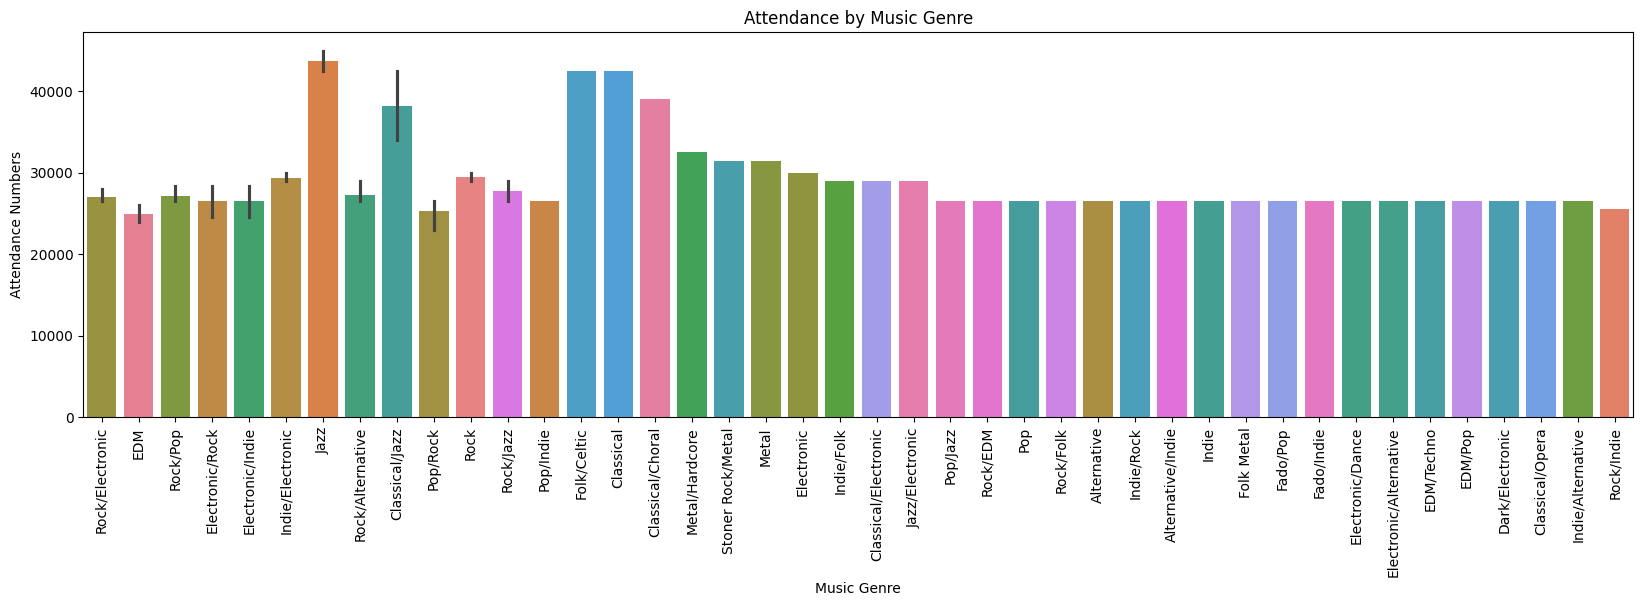

In [463]:
# Attendance between countries
sns.barplot(data=copyData, x='Country', y='Attendance_Numbers', hue="Country", legend=False, order=copyData.groupby('Country')['Attendance_Numbers'].sum().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(20, 5)
plt.xlabel('Country')
plt.ylabel('Attendance Numbers')
plt.title('Attendance by Country')
plt.show()

# Attendance by Music Genre
sns.barplot(data=copyData, x='Music_Genre', y='Attendance_Numbers', hue="Music_Genre", legend=False, order=copyData.groupby('Music_Genre')['Attendance_Numbers'].sum().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(20, 5)
plt.xlabel('Music Genre')
plt.ylabel('Attendance Numbers')
plt.title('Attendance by Music Genre')
plt.show()


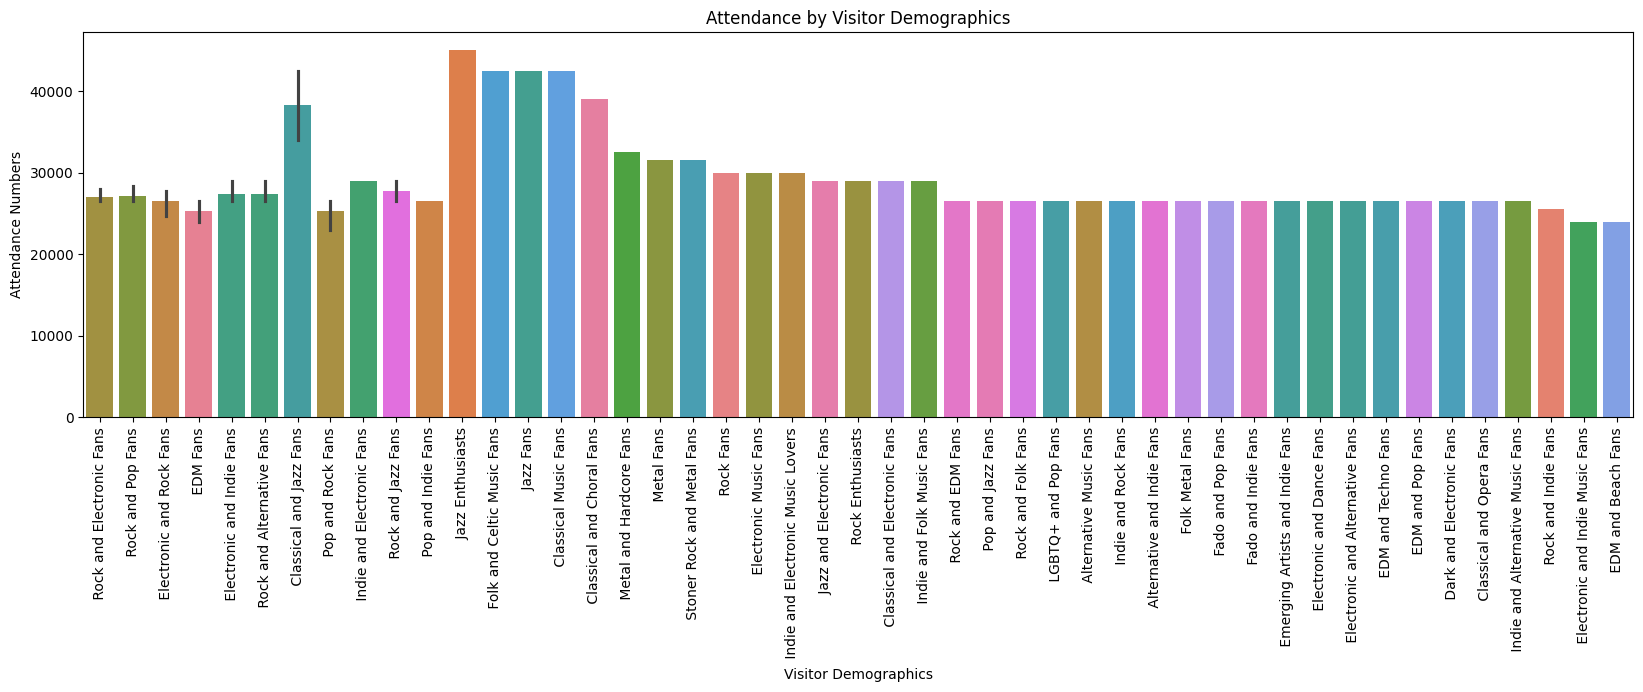

In [464]:
# Age demographics by 
sns.barplot(data=copyData, x='Visitor_Demographics', y='Attendance_Numbers', hue="Visitor_Demographics", legend=False, order=copyData.groupby('Visitor_Demographics')['Attendance_Numbers'].sum().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(20, 5)
plt.xlabel('Visitor Demographics')
plt.ylabel('Attendance Numbers')
plt.title('Attendance by Visitor Demographics')
plt.show()

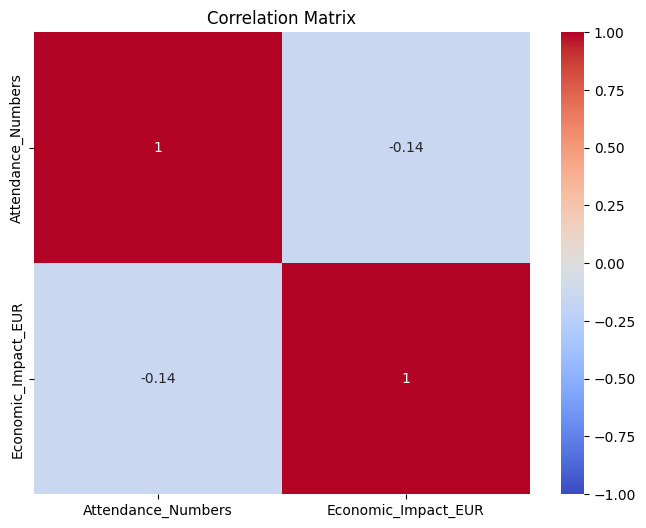

In [465]:
# Correlation matrix

corr = copyData[['Attendance_Numbers', 'Economic_Impact_EUR']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


No strong correlation between the Attendance Numbers and the Economic Impact

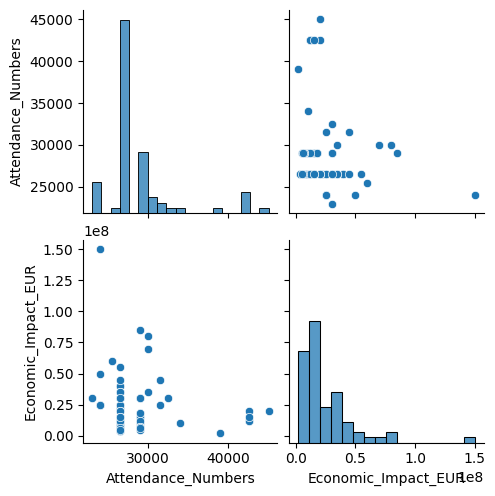

In [466]:
sns.pairplot(copyData[['Attendance_Numbers', 'Economic_Impact_EUR']])
plt.show()
